In [1]:
import os
# AIX環境での proxy の設定．
# keras.datasetsでは，datasetを直接ダウンロードするので，学内マシンからは通常必要．
os.environ["http_proxy"] = "http://proxy.uec.ac.jp:8080/"
os.environ["https_proxy"] = "http://proxy.uec.ac.jp:8080/"
os.environ["CUDA_VISIBLE_DEVICES"] = "1"      # "0":GPU0, "1":GPU1, "0,1":GPUを2つとも使用

import numpy as np
import keras
from keras.preprocessing import image

/usr/lib/python3.4/importlib/_bootstrap.py:321: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  return f(*args, **kwds)
Using TensorFlow backend.
using GPU: 1


In [2]:
# ResNet50 による 1000種類分類
from keras.applications.xception import Xception
from keras.preprocessing import image
from keras.applications.xception import preprocess_input, decode_predictions

model =  Xception(weights='imagenet', include_top=True) 
# include_top=False とすると全結合手前までの読み込みになる．特徴抽出に利用する．

img_path = 'dog.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds= model.predict(x)
# top-5 まで表示．
print('Predicted:', decode_predictions(preds, top=5)[0])

91889664/91884032 [==============================] - 8s 0us/step
Predicted: [('n02099601', 'golden_retriever', 0.98309684), ('n02099712', 'Labrador_retriever', 0.010538722), ('n02100735', 'English_setter', 0.0014475655), ('n02101556', 'clumber', 0.0010622467), ('n04409515', 'tennis_ball', 0.001057219)]


In [3]:
img_path = 'jellyfish.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds= model.predict(x)
# top-5 まで表示．
print('Predicted:', decode_predictions(preds, top=5)[0])

Predicted: [('n01910747', 'jellyfish', 0.99998415), ('n07734744', 'mushroom', 6.1893516e-06), ('n01914609', 'sea_anemone', 4.057149e-06), ('n02009912', 'American_egret', 8.853142e-07), ('n01930112', 'nematode', 7.650957e-07)]


In [4]:
img_path = 'sealion.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds= model.predict(x)
# top-5 まで表示．
print('Predicted:', decode_predictions(preds, top=5)[0])

Predicted: [('n02077923', 'sea_lion', 1.0), ('n02074367', 'dugong', 2.9993743e-08), ('n02113978', 'Mexican_hairless', 2.7681061e-08), ('n02444819', 'otter', 2.715203e-08), ('n01494475', 'hammerhead', 1.3085214e-08)]


### 課題4

以下の小問の(1)-(2)を解答すること．(3)は任意（できるだけやってみる方が望ましい．）．

1. ResNet50, Xception, MobileNetで，3枚以上の画像について，それぞれ1000種類認識を行うこと．
1. 上記のデータセットで，VGG16をfine-tuningして，画像分類を行うこと．
1. (2)と同様に, MobileNet, Xception, ResNet50など，別のネットワークで fine-tuningして，学習時間と精度を比較せよ．

(2), (3)は以下のデータセットのどれかを利用すること．UEC-Food20 のみ20種類で，あとは10種類です．すべて1クラス100枚ずつ入っています．  
（自分で用意可能な人は，自分で用意したものを利用してもよい．各カテゴリ100枚10クラス以上用意せよ．）

 * UEC-Food20 http://mm.cs.uec.ac.jp/uecfood20.zip
 * UEC-Food10 http://mm.cs.uec.ac.jp/uecfood10.zip (上記の10種類版．メモリが足りない場合にどうぞ．)
 * FlickrMaterialDatabase(FMD) http://mm.cs.uec.ac.jp/material10.zip


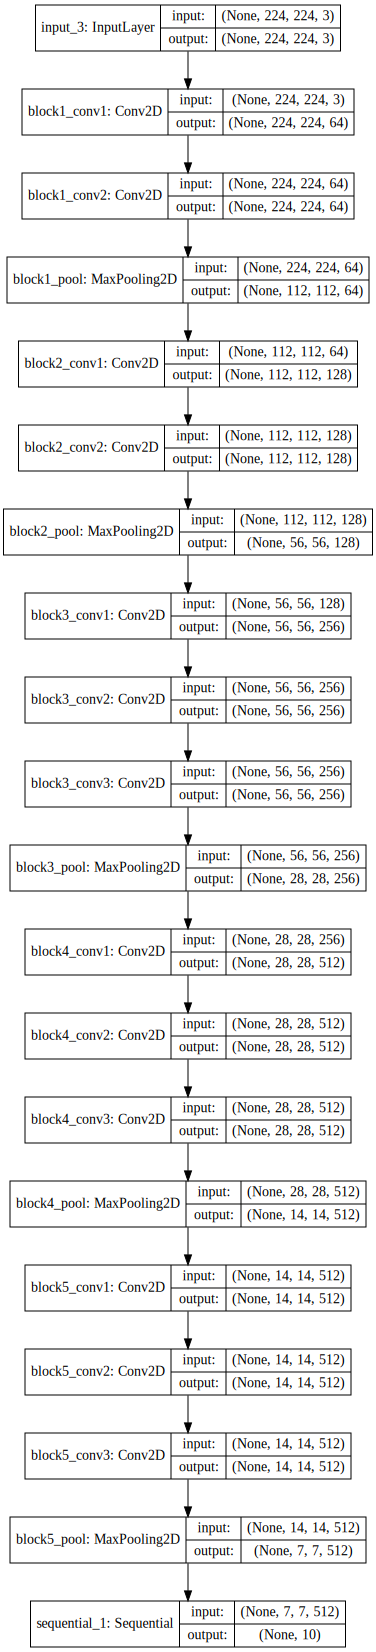

In [14]:
SVG(model_to_dot(vgg_model, show_shapes=True, show_layer_names=True).create(prog='dot', format='svg'))

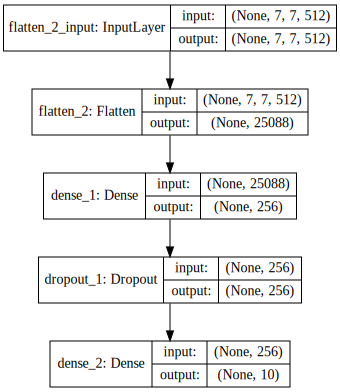

In [15]:
SVG(model_to_dot(top_model, show_shapes=True, show_layer_names=True).create(prog='dot', format='svg'))

Xception